In [152]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
airbnb = pd.read_csv('airbnb.csv', low_memory=False)
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])
airbnb['first_review'] = pd.to_datetime(airbnb['first_review'])
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb.head(3)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",...,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,0.39
1,3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...",...,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,4.69
2,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,Read My Full Listing For All Information. New ...,From the apartment is a 10 minute walk to Gran...,I will meet you upon arrival.,...,9.0,10.0,10.0,10.0,9.0,f,moderate,t,t,0.59


## Description of AirBnB data
- id: Listing ID, should be unique 
- name: Name of the listing
- summary: Summary of the listing
- space: Description of space on posting
- description: Description of listing 
- experiences_offered: Whether or not experiences are offered with the listing
- neighborhood_overview: Description of neighborhood listing is in
- notes: Additional notes on thee listing
- transit: Transit services near the listing
- access: Where the guest will have access to in the listing
- interaction: Host interaction description
- house_rules: Description of house rules
- host_id: ID of the host for thee listing
- host_name: Name of the host/hosts
- host_since: When they first started renting out rooms/apartment, Dates in the format YYYY-MM-DD
- host_about: Description off the host
- host_response_time: Time it takes host to respond to queries about listing
- host_response_rate: Host rate of response
- host_acceptance_rate: Host’s acceptance rate of offer
- host_is_superhost: t/f if host is a superhost
- host_neighborhood: Neighborhood that the host lives in I think
- host_total_listing_count: Total number of listings the host has
- host_ideentity_verified: t/f if host has verified identity
- neighbourhood: neighborhood of the listing
- neighbourhood_cleansed: More specific neighborhood I think
- neighbourhood_group_cleansed: Borough I think
- city: City of listing
- state: State of listing
- smart_location: Also borough I think
- latitude: Latitude of listing
- longitude: Longitude of listing
- property_type: Building type of listing
- room_type: Type of the room up for rent
- bathrooms: Number of bathrooms available in listing
- bedrooms: Number of bedrooms available in listing
- beds: Number of beds in available in listing
- bed_type: Type of bed in the listing
- square_feet: sqft of the listing
- price: How much the listing is
- weekly_price: How much it is to rent for a week
- monthly_price: how much it is to rent for a month
- security_deeposit: Security deposit for listing I think
- cleaning_fee: Claning fee of the listing
- guests_included: How many guests are included for the listing
- extra_people: Cost of adding extra people to the listing
- minimum_nights: Minimum nights you have to rent for
- maximum_nights: Maximum time you can rent for
- number_of_reviews: However many reviews thee listing has
- number_of_reviews_ltm: Not sure
- first_review: Date of the first review, Dates in the format YYYY-MM-DD
- last_review: Date of the last review, Dates in the format YYYY-MM-DD
- review_scores_rating: Total rating for thee listing
- review_scores_accuracy: Score of the accuracy?
- review_scores_cleanliness: Review of cleanliness of listing
- review_scores_checkin: Review of checkin process
- review_scores_communication: Review of communication of listing owner
- review_scores_location: Review of the location of the listing
- review_scores_value: Review of value
- is_business_travel_ready: t/f if rental is ready for business travelers?
- cancellation_policy: Cancellation policy of the listing
- require_guest_profile_picture: t/f if the guest needs to have a profile pic
- require_guest_phone_verification: t/f if the guest needs to verify on phone
- reviews_per_month: Average number of reviews per month

In [141]:
print("First AirBnB listing: " + str(min(airbnb['host_since'])))
print("Latest AirBnB listing: " + str(max(airbnb['host_since'])))

First AirBnB listing: 2008-08-22 00:00:00
Latest AirBnB listing: 2020-02-11 00:00:00


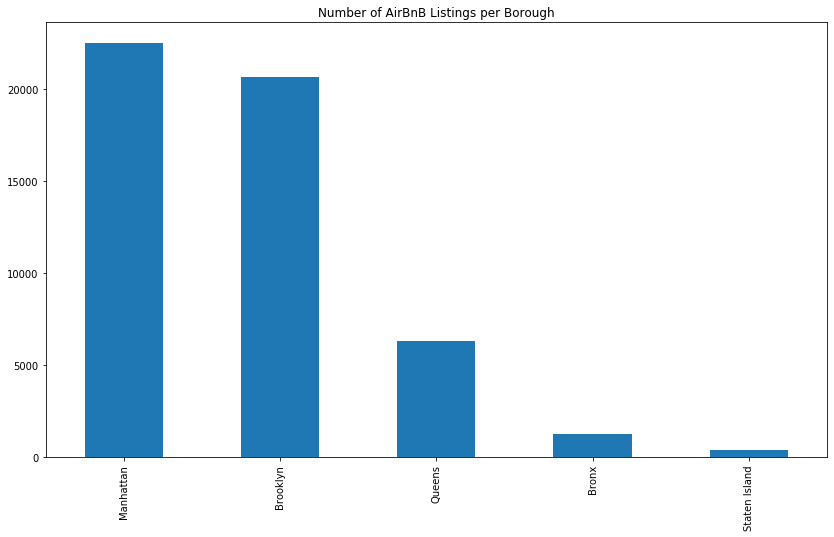

In [148]:
airbnb['neighbourhood_group_cleansed'].value_counts().plot(kind='bar', 
                                                                figsize=(14,8),
                                                                title="Number of AirBnB Listings per Borough")

In [132]:
# Processing rent data

rent = pd.read_csv("medianAskingRent_All.csv")
rent = rent.groupby('Borough').mean().reset_index()
rent.set_index('Borough',inplace=True)
rent = rent.transpose()
dates = list(rent.index)
rent['Dates'] = dates
rent.reset_index(inplace = True) 
rent = rent.rename_axis(index=None, columns=None)
del rent['index']
rent['Dates'] = pd.to_datetime(rent['Dates'])

discount = pd.read_csv("discountShare_All.csv")
discount = discount.groupby('Borough').mean().reset_index()
discount.set_index('Borough',inplace=True)
discount = discount.transpose()
dates = list(discount.index)
discount['Dates'] = dates
discount.reset_index(inplace = True) 
discount = discount.rename_axis(index=None, columns=None)
del discount['index']
discount['Dates'] = pd.to_datetime(discount['Dates'])

inventory = pd.read_csv("rentalInventory_All.csv")
inventory = inventory.groupby('Borough').mean().reset_index()
inventory.set_index('Borough',inplace=True)
inventory = inventory.transpose()
dates = list(inventory.index)
inventory['Dates'] = dates
inventory.reset_index(inplace = True) 
inventory = inventory.rename_axis(index=None, columns=None)
del inventory['index']
inventory['Dates'] = pd.to_datetime(inventory['Dates'])

## Rent data
The rent df shows the average of median rent prices across all neighborhoods in each borough, Dates in the format YYYY-MM-DD

In [133]:
rent.head(3)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Dates
0,1421.00,2019.424242,3003.794118,1598.8125,NaN,2010-01-01
1,1410.75,1973.794118,2982.500000,1558.5000,NaN,2010-02-01
2,1402.00,1974.677419,2884.142857,1587.2500,NaN,2010-03-01


Text(0.5, 0.98, 'Average Median Rent in Manhattan')

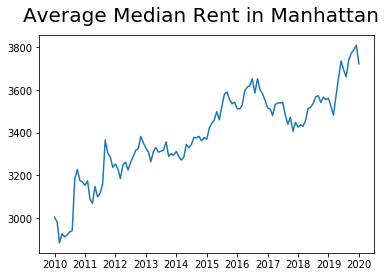

In [166]:
fig = plt.figure()
plt.plot(rent['Dates'], rent['Manhattan'])
fig.suptitle('Average Median Rent in Manhattan', fontsize=20)

## Discount data
The discount df is the average of the share of all active rental listings on StreetEasy that had a reduction in asking rent during that month/quarter/year. Dates in the format YYYY-MM-DD

In [134]:
discount.head(3)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Dates
0,0.03550,0.096174,0.106194,0.049455,NaN,2010-01-01
1,0.03350,0.087400,0.091030,0.068909,NaN,2010-02-01
2,0.01425,0.114360,0.098886,0.082800,NaN,2010-03-01


Text(0.5, 0.98, 'Average % of Rent Prices that were Discounted in Manhattan')

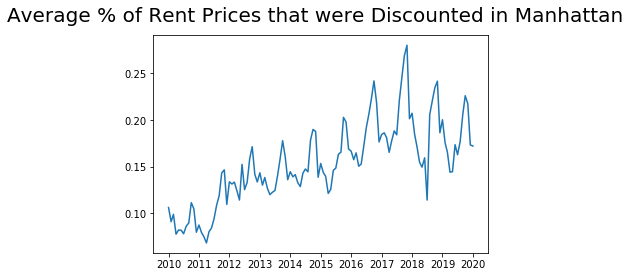

In [169]:
fig = plt.figure()
plt.plot(discount['Dates'], discount['Manhattan'])
fig.suptitle('Average % of Rent Prices that were Discounted in Manhattan', fontsize=20)

## Inventory data
The inventory df is the average number of active rental listings across each borough, Dates in the format YYYY-MM-DD

In [135]:
inventory.head(3)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Dates
0,397.465116,60.345455,879.315789,132.083333,10.0,2010-01-01
1,409.348837,61.054545,915.921053,135.683333,9.0,2010-02-01
2,415.325581,62.909091,931.263158,137.500000,10.0,2010-03-01


Text(0.5, 0.98, 'Average Number of Listings in Manhattan')

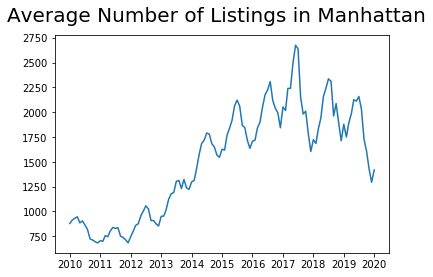

In [171]:
fig = plt.figure()
plt.plot(inventory['Dates'], inventory['Manhattan'])
fig.suptitle('Average Number of Listings in Manhattan', fontsize=20)